Olá, 

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
   
<span class="text-danger"> O projeto apresenta vários pontos de correção. Vamos fazer mais uma iteraçãõ. Caso não seja possível sanar, vou pedir uma mentoria para você.</span>
     
Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>



<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Houve avanços mas o projeto voltou com erro de execução </div>

In [2]:
#importando biblotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
visits_log_us = pd.read_csv('/datasets/visits_log_us.csv') 
orders_log_us = pd.read_csv('/datasets/orders_log_us.csv')
costs_us = pd.read_csv('/datasets/costs_us.csv')

In [4]:
visits_log_us.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
orders_log_us.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
costs_us.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


# *Primeira parte (VENDAS)*

In [10]:
#Convertendo e analisando os dados do visits_log_us
column_names = visits_log_us.columns
lowercase_names = [name.lower() for name in column_names]
visits_log_us.columns = lowercase_names

stripped_names = [name.strip() for name in column_names]
lowercase_names = [name.lower() for name in stripped_names]
visits_log_us.columns = lowercase_names

rename_dict = {'start ts': 'start_ts', 'source id':'source_id', 'end ts':'end_ts'}
visits_log_us.rename(columns=rename_dict, inplace=True) 

visits_log_us

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [11]:
visits_log_us['end_ts'] = pd.to_datetime(visits_log_us['end_ts'], format="%Y-%m-%d %H:%M:%S")

visits_log_us['start_ts'] = pd.to_datetime(visits_log_us['start_ts'], format="%Y-%m-%d %H:%M:%S")
visits_log_us['day'] = visits_log_us['start_ts'].dt.date
visits_log_us['week'] = visits_log_us['start_ts'].dt.to_period('W')
visits_log_us['month'] = visits_log_us['start_ts'].dt.to_period('M')

visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
 5   day        359400 non-null  object        
 6   week       359400 non-null  period[W-SUN] 
 7   month      359400 non-null  period[M]     
dtypes: datetime64[ns](2), int64(1), object(2), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 21.9+ MB



<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

convém converter colunas para snake_case
</div>

In [17]:
user_device = visits_log_us.groupby('device').nunique()
user_device

,end_ts,source_id,start_ts,uid,day,week,month,session_duration
device,,,,,,,,
desktop,180758,9,180454,164523,364,53,12,302
touch,84649,9,84499,71345,363,53,12,183


In [18]:
#Quantas pessoas usam-no cada dia, semana e mês?
daily_users = visits_log_us.groupby('day')['uid'].nunique()
weekly_users = visits_log_us.groupby('week')['uid'].nunique()
monthly_users = visits_log_us.groupby('month')['uid'].nunique()

print("Usuários por dia:", daily_users)

print("Usuários por semana:", weekly_users)

print("Usuários por mês:", monthly_users)

Usuários por dia: day
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64
Usuários por semana: week
2017-05-29/2017-06-04     2021
2017-06-05/2017-06-11     4129
2017-06-12/2017-06-18     2812
2017-06-19/2017-06-25     2878
2017-06-26/2017-07-02     3064
2017-07-03/2017-07-09     3294
2017-07-10/2017-07-16     4355
2017-07-17/2017-07-23     3841
2017-07-24/2017-07-30     2655
2017-07-31/2017-08-06     2364
2017-08-07/2017-08-13     2444
2017-08-14/2017-08-20     2746
2017-08-21/2017-08-27     3116
2017-08-28/2017-09-03     3694
2017-09-04/2017-09-10     4412
2017-09-11/2017-09-17     4319
2017-09-18/2017-09-24     4874
2017-09-25/2017-10-01     6241
2017-10-02/2017-10-08     7612
2017-10-09/2017-10-15     7074
2017-10-16/2017-10-22     7148
2017-10-23/2017-10-29     7401
2017-10-30/2017-11-05   

In [19]:
#Quantas sessões ocorrem por dia? 
daily_sessions = visits_log_us.groupby('day').size()
print("Sessões por dia:", daily_sessions)

Sessões por dia: day
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Length: 364, dtype: int64


In [20]:
#Que comprimento tem cada sessão?
visits_log_us['start_ts'] = pd.to_datetime(visits_log_us['start_ts'])
visits_log_us['end_ts'] = pd.to_datetime(visits_log_us['end_ts'])
visits_log_us['session_duration'] = (visits_log_us['end_ts'] - visits_log_us['start_ts']).dt.total_seconds()

avg_session_duration = visits_log_us['session_duration'].mean()
print("Duração média de cada sessão:", avg_session_duration, "segundos")

Duração média de cada sessão: 643.0256872565387 segundos


In [21]:
#Com que frequência os usuários voltam?
user_sessions = visits_log_us.groupby('uid')['source_id'].count()
avg_return_frequency = user_sessions.mean()
print("Frequência de retorno dos usuários:", avg_return_frequency)

Frequência de retorno dos usuários: 1.5751482453795214


<AxesSubplot:xlabel='day'>

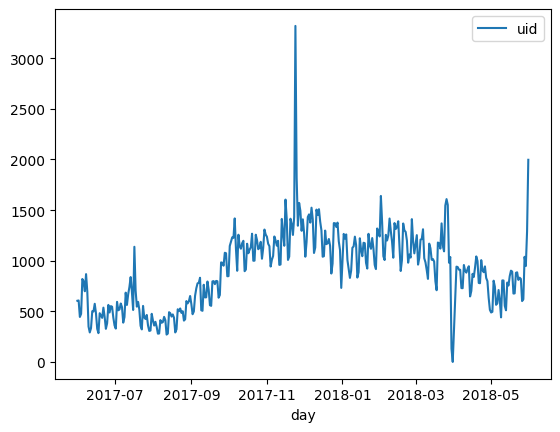

In [22]:
user_day = visits_log_us.groupby('day').agg({'uid': 'nunique'})
user_day.plot()

<AxesSubplot:xlabel='week'>

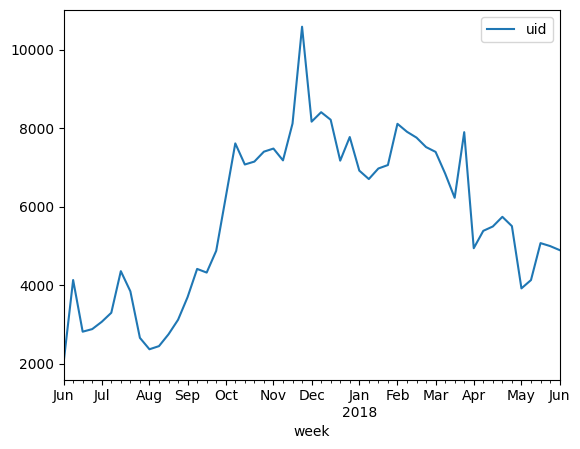

In [23]:
user_week = visits_log_us.groupby('week').agg({'uid': 'nunique'})
user_week.plot()

<AxesSubplot:xlabel='month'>

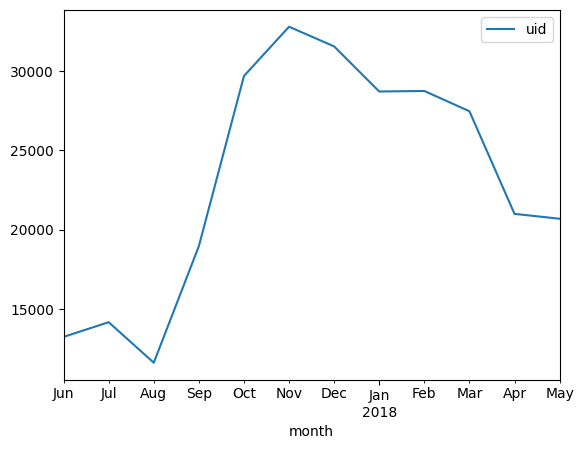

In [24]:
user_month = visits_log_us.groupby('month').agg({'uid': 'nunique'})
user_month.plot()

In [25]:
visits_log_us

,device,end_ts,source_id,start_ts,uid,day,week,month,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,1680.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,1440.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,0.0
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-24/2017-07-30,2017-07,19.0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-22/2018-01-28,2018-01,19.0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-02-26/2018-03-04,2018-03,19.0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-10-30/2017-11-05,2017-11,19.0


<AxesSubplot:>

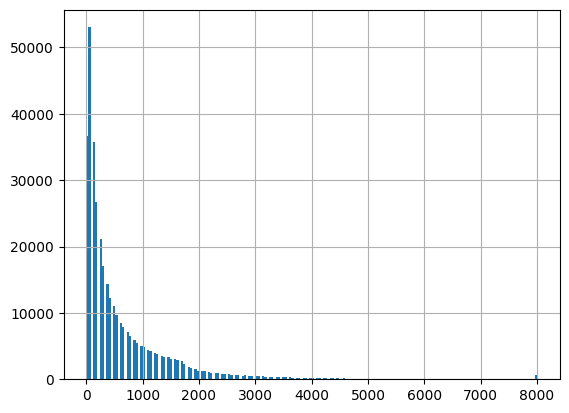

In [26]:
visits_log_us['session_duration'].clip(0,8000).hist(bins=200)

In [27]:
first_visit = visits_log_us.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visit['first_visit_dt'] = first_visit['start_ts']
first_visit['first_visit_month'] = first_visit['start_ts'].dt.to_period('M')
first_visit.drop(columns = ['start_ts'], inplace = True)
visits_full = pd.merge(first_visit, visits_log_us, on = 'uid')

visits_full['order_month'] = visits_full['start_ts'].dt.to_period('M')
visits_full['age'] = (visits_full['month'].astype('int64') - visits_full['first_visit_month'].astype('int64'))

In [28]:
pivot_visit = visits_full.pivot_table(index = 'first_visit_month', columns = 'age', values = 'uid', aggfunc = 'nunique') 

In [29]:
#Calculando a taxa de retenção
retention_rates = pivot_visit.copy()
for col in retention_rates.columns[1:]:
  retention_rates[col] = retention_rates[col] / retention_rates[0]

retention_rates[0] = retention_rates[0]/retention_rates[0]

retention_rates.fillna("")

age,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02,1.0,0.05708,0.025454,0.020093,,,,,,,,


<AxesSubplot:xlabel='age', ylabel='first_visit_month'>

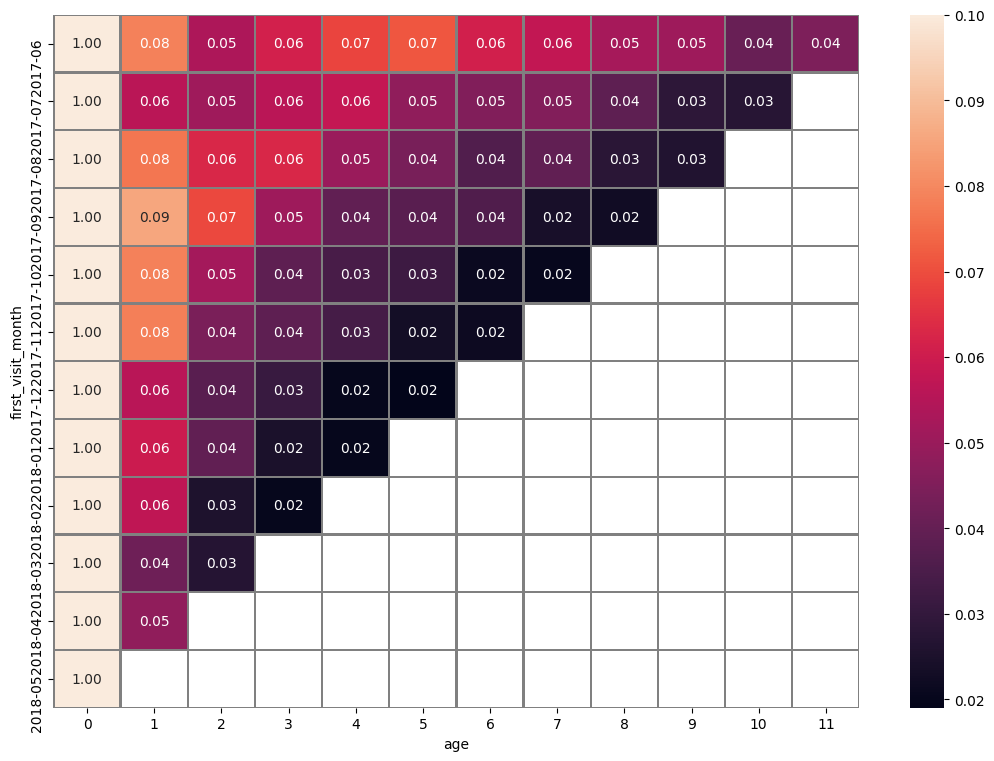

In [30]:
#Heatmap da taxa de retenção
plt.figure(figsize=(13, 9))
sns.heatmap(retention_rates, annot=True, fmt='.2f', linewidths=1, linecolor='grey', vmax=0.1)


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Precisa calcular e plotar gráficos para visitas diárias, semanais e mensais. Dica: visits.groupby('session_week').agg({'uid': 'nunique'})
- Qual é a distribuição do comprimento da sessã?
- Com que frequência os usuarios voltam? VoCê precisa calcular a taxa de retenção. Vou deixar um código de exemplo, Daí, você precisa plotar heatmap   
</div>

In [31]:
first_visits = visits_log_us.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits['first_session_dt'] = first_visits['start_ts']
first_visits['first_session_month'] = first_visits['start_ts'].dt.to_period('M')
first_visits.drop(columns = ['start_ts'], inplace = True)
visits_full = pd.merge(first_visits, visits_log_us, on = 'uid')
#proximo passo é calcular a diferença entre o mẽs da sessão e o 1o mês e então dividir por np.timedelta64(1,'M')).round().astype('int')

In [32]:
visits_full.head()

,uid,first_session_dt,first_session_month,device,end_ts,source_id,start_ts,day,week,month,session_duration
0,11863502262781,2018-03-01 17:27:00,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-02-26/2018-03-04,2018-03,360.0
1,49537067089222,2018-02-06 15:55:00,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-05/2018-02-11,2018-02,120.0
2,297729379853735,2017-06-07 18:47:00,2017-06,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-05/2017-06-11,2017-06,60.0
3,313578113262317,2017-09-18 22:49:00,2017-09,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018-03-05/2018-03-11,2018-03,360.0
4,313578113262317,2017-09-18 22:49:00,2017-09,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-18/2017-09-24,2017-09,1080.0


In [33]:
visits_full['age'] = (visits_full['month'].astype('int64') - visits_full['first_session_month'].astype('int64'))
visits_full.head()

,uid,first_session_dt,first_session_month,device,end_ts,source_id,start_ts,day,week,month,session_duration,age
0,11863502262781,2018-03-01 17:27:00,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-02-26/2018-03-04,2018-03,360.0,0
1,49537067089222,2018-02-06 15:55:00,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-05/2018-02-11,2018-02,120.0,0
2,297729379853735,2017-06-07 18:47:00,2017-06,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-05/2017-06-11,2017-06,60.0,0
3,313578113262317,2017-09-18 22:49:00,2017-09,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018-03-05/2018-03-11,2018-03,360.0,6
4,313578113262317,2017-09-18 22:49:00,2017-09,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-18/2017-09-24,2017-09,1080.0,0


# Segunda parte (PRODUTOS) 

In [34]:
column_names = orders_log_us.columns
lowercase_names = [name.lower() for name in column_names]
orders_log_us.columns = lowercase_names

stripped_names = [name.strip() for name in column_names]
lowercase_names = [name.lower() for name in stripped_names]
orders_log_us.columns = lowercase_names

rename_dict = {'buy ts': 'buy_ts'}
orders_log_us.rename(columns=rename_dict, inplace=True)

orders_log_us

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [35]:
#Convertendo e analisando dados do orders_log_us
orders_log_us['buy_ts'] = pd.to_datetime(orders_log_us['buy_ts'], format="%Y-%m-%d %H:%M:%S")
orders_log_us['day'] = orders_log_us['buy_ts'].dt.date
orders_log_us['week'] = orders_log_us['buy_ts'].dt.to_period('W')
orders_log_us['month'] = orders_log_us['buy_ts'].dt.to_period('M')

orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
 3   day      50415 non-null  object        
 4   week     50415 non-null  period[W-SUN] 
 5   month    50415 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), object(1), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 2.3+ MB


<AxesSubplot:>

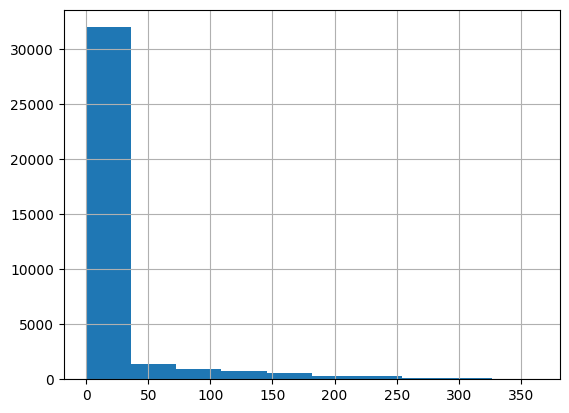

In [36]:
#Quando as pessoas começam a comprar?
first_visit = visits_log_us.groupby('uid')['start_ts'].min().reset_index()
first_order = orders_log_us.groupby('uid')['buy_ts'].min().reset_index()

visit_order = pd.merge(first_visit, first_order, on='uid')

visit_order['days_to_conversion'] = (visit_order['buy_ts'] - visit_order['start_ts']).dt.days

visit_order['days_to_conversion'].hist()

<s>
<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Não está claro quando as pessoas começam a comprar? Quanto tempo em média? Precias plotar a distribuição.
</div>

In [37]:
#Quantos pedidos os clientes fazem durante um determinado período de tempo?
first_order = orders_log_us.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_order['first_order_dt'] = first_order['buy_ts']
first_order['first_order_month'] = first_order['buy_ts'].dt.to_period('M')
first_order.drop(columns = ['buy_ts'], inplace = True)
orders_full = pd.merge(first_order, orders_log_us, on = 'uid')

orders_full['order_month'] = orders_full['buy_ts'].dt.to_period('M')
orders_full['age'] = (orders_full['month'].astype('int64') - orders_full['first_order_month'].astype('int64'))


<AxesSubplot:xlabel='age', ylabel='month'>

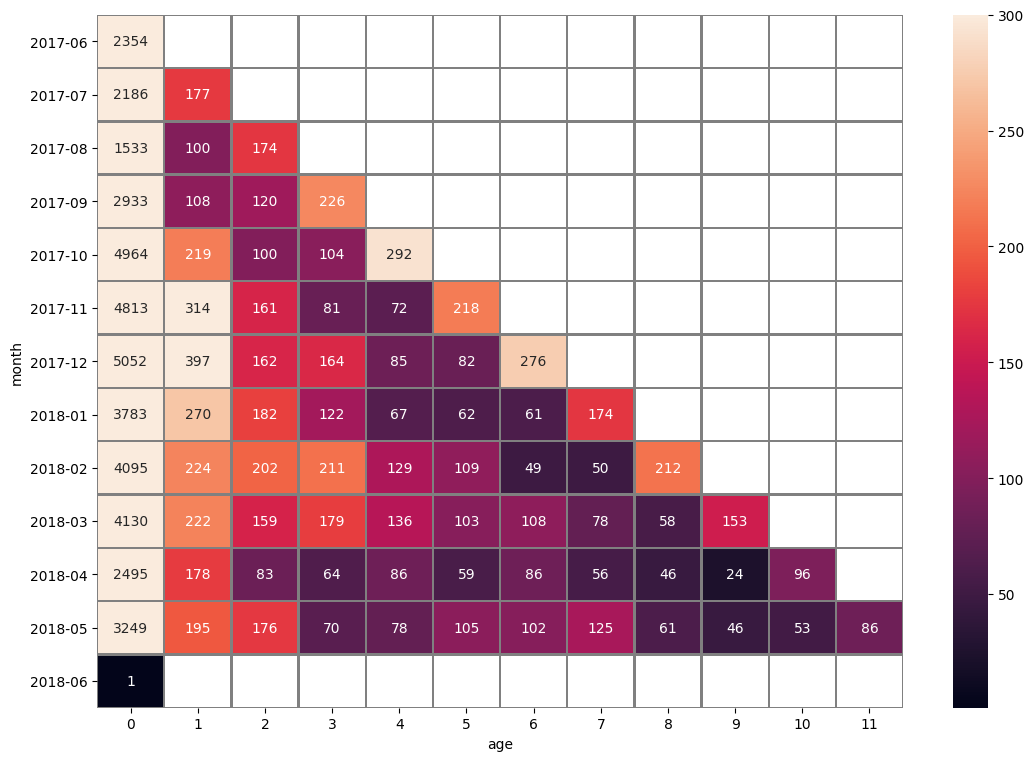

In [38]:
plt.figure(figsize=(13, 9))
sns.heatmap(orders_full.pivot_table(index = 'month', columns = 'age', values = 'uid', aggfunc = 'count'), data=orders_full, annot=True, fmt='.0f', linewidths=1, linecolor='grey', vmax=300)#, center = 10, vmax=1.0, cmap=sns.diverging_palette(20, 220, as_cmap=True), cbar_kws= {'orientation': 'horizontal'}).set(title = 'Retention Rate')

<s>
<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você precisa calcular a média em função da data de 1a compra e o tempo (1, 2, 3 etc meses). Precisa plotar heatmap
</div>

Volume médio de uma compra: month
2017-06    4.060106
2017-07    5.306589
2017-08    4.847139
2017-09    5.416448
2017-10    4.928280
2017-11    4.783518
2017-12    5.852139
2018-01    4.112927
2018-02    4.840095
2018-03    5.413930
2018-04    5.150645
2018-05    4.771279
2018-06    3.420000
Freq: M, Name: revenue, dtype: float64


<AxesSubplot:xlabel='month'>

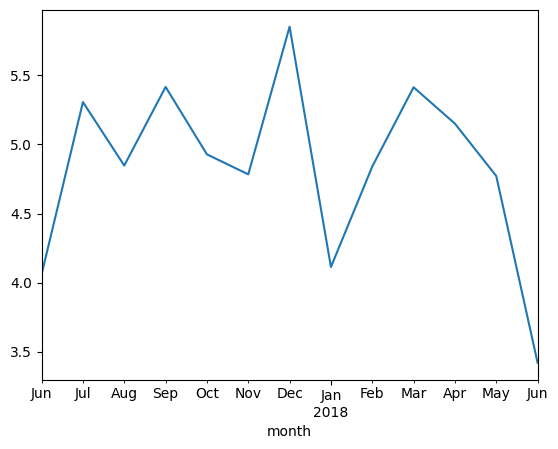

In [39]:
#Qual é o volume médio de uma compra?
avg_order_value = orders_log_us.groupby('month')['revenue'].mean()
print("Volume médio de uma compra:", avg_order_value)

avg_order_value.plot()

In [40]:
orders_log_us

,buy_ts,revenue,uid,day,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29/2017-06-04,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29/2017-06-04,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29/2017-06-04,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29/2017-06-04,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29/2017-06-04,2017-06
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-28/2018-06-03,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-28/2018-06-03,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-28/2018-06-03,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-28/2018-06-03,2018-05


In [41]:
orders_full

,uid,first_order_dt,first_order_month,buy_ts,revenue,day,week,month,order_month,age
0,313578113262317,2018-01-03 21:51:00,2018-01,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01/2018-01-07,2018-01,2018-01,0
1,1575281904278712,2017-06-03 10:13:00,2017-06,2017-06-03 10:13:00,1.22,2017-06-03,2017-05-29/2017-06-04,2017-06,2017-06,0
2,1575281904278712,2017-06-03 10:13:00,2017-06,2017-06-03 17:39:00,1.83,2017-06-03,2017-05-29/2017-06-04,2017-06,2017-06,0
3,2429014661409475,2017-10-11 18:33:00,2017-10,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-09/2017-10-15,2017-10,2017-10,0
4,2464366381792757,2018-01-28 15:54:00,2018-01,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-22/2018-01-28,2018-01,2018-01,0
...,...,...,...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22 23:55:00,2017-09,2017-09-24 23:48:00,0.24,2017-09-24,2017-09-18/2017-09-24,2017-09,2017-09,0
50411,18445407535914413204,2017-09-22 23:55:00,2017-09,2017-09-25 15:56:00,0.12,2017-09-25,2017-09-25/2017-10-01,2017-09,2017-09,0
50412,18445601152732270159,2018-03-26 22:54:00,2018-03,2018-03-26 22:54:00,4.22,2018-03-26,2018-03-26/2018-04-01,2018-03,2018-03,0
50413,18446156210226471712,2018-02-18 19:34:00,2018-02,2018-02-18 19:34:00,9.78,2018-02-18,2018-02-12/2018-02-18,2018-02,2018-02,0


<s>
<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você precisa plotar o gráfico tendo mês da compra no eixo X
</div>

In [42]:
#Quanto dinheiro eles trazem para a empresa (LTV)?
corrot_size = orders_full.groupby('first_order_month')['uid'].nunique().reset_index()
corrot_size

,first_order_month,uid
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [43]:
df_ltv = orders_full.groupby(['first_order_month', 'age'])['revenue'].sum().reset_index()
df_ltv = df_ltv.merge(corrot_size, on='first_order_month')

In [44]:
df_ltv['ltv'] = df_ltv['revenue'] / df_ltv['uid']

<AxesSubplot:xlabel='age', ylabel='first_order_month'>

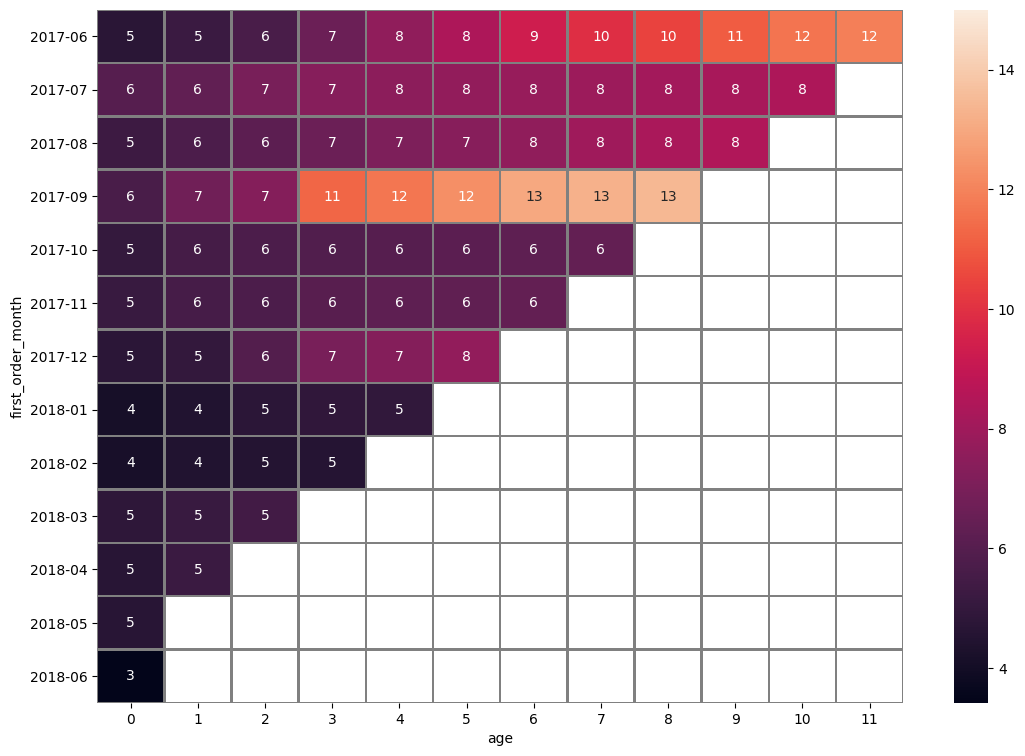

In [45]:
plt.figure(figsize=(13, 9))
sns.heatmap(df_ltv.pivot_table(index = 'first_order_month', columns = 'age', values = 'ltv', aggfunc = 'sum').cumsum(axis = 1), annot=True, fmt='.0f', linewidths=1, linecolor='grey', vmax=15)

<s>
<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você precisa calcular a média em função da data de 1a compra e o tempo (1, 2, 3 etc meses). Precisa plotar heatmap
</div>

# Terceira parte (MARKETING)

In [46]:
costs_us 

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [47]:
costs_us['dt'] = pd.to_datetime(costs_us['dt'], format="%Y-%m-%d")
costs_us['day'] = costs_us['dt'].dt.date
costs_us['week'] = costs_us['dt'].dt.to_period('W')
costs_us['month'] = costs_us['dt'].dt.to_period('M')

costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   day        2542 non-null   object        
 4   week       2542 non-null   period[W-SUN] 
 5   month      2542 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1), period[W-SUN](1)
memory usage: 119.3+ KB


In [48]:
#Quanto dinheiro foi gasto?
total_costs = costs_us['costs'].sum()
print("Total de gastos:", total_costs)

costs_by_source = costs_us.groupby('source_id')['costs'].sum()
print("Gastos por origem:", costs_by_source)

costs_over_time_head = costs_us.sort_values(by='costs', ascending=False).head(20)
costs_over_time = costs_over_time_head.groupby('dt')['costs'].sum()
print("Gastos ao longo do tempo:", costs_over_time)

Total de gastos: 329131.62
Gastos por origem: source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64
Gastos ao longo do tempo: dt
2017-10-06     980.52
2017-10-27     824.66
2017-11-03     811.14
2017-11-24    1788.28
2017-11-25     803.14
2017-11-27     831.73
2017-11-30     777.52
2017-12-05     788.03
2017-12-11    1061.18
2017-12-12     802.27
2017-12-28     858.28
2018-01-03     844.63
2018-01-19     784.57
2018-02-05     845.75
2018-02-09     822.49
2018-02-13     791.51
2018-02-19     774.05
2018-02-22     769.47
2018-03-07     996.15
2018-05-31     822.30
Name: costs, dtype: float64


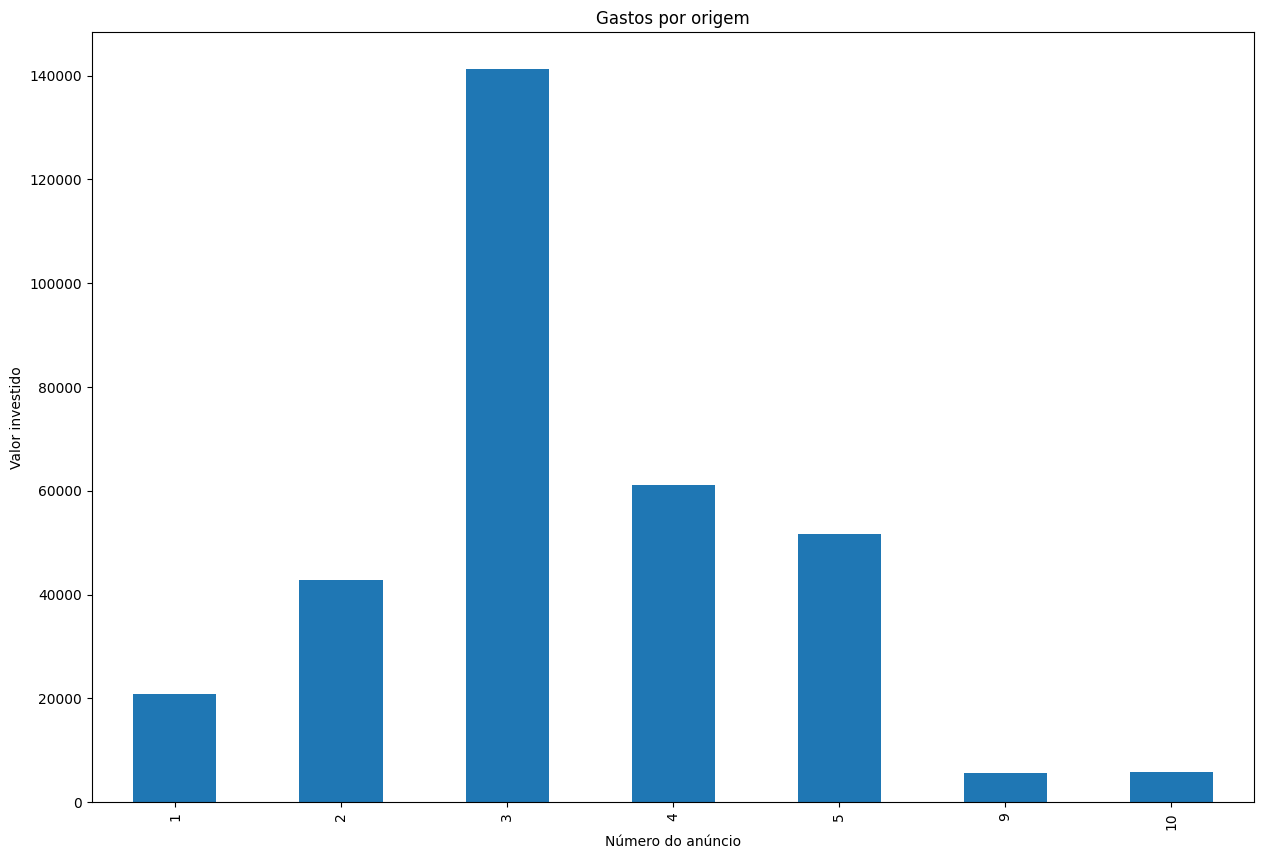

In [49]:
costs_by_source.plot(xlabel='Número do anúncio',
                 ylabel='Valor investido',
                 x='costs',
                 y='source_id',
                 kind = 'bar',
                 figsize=(15, 10),
                 title='Gastos por origem')

plt.show()

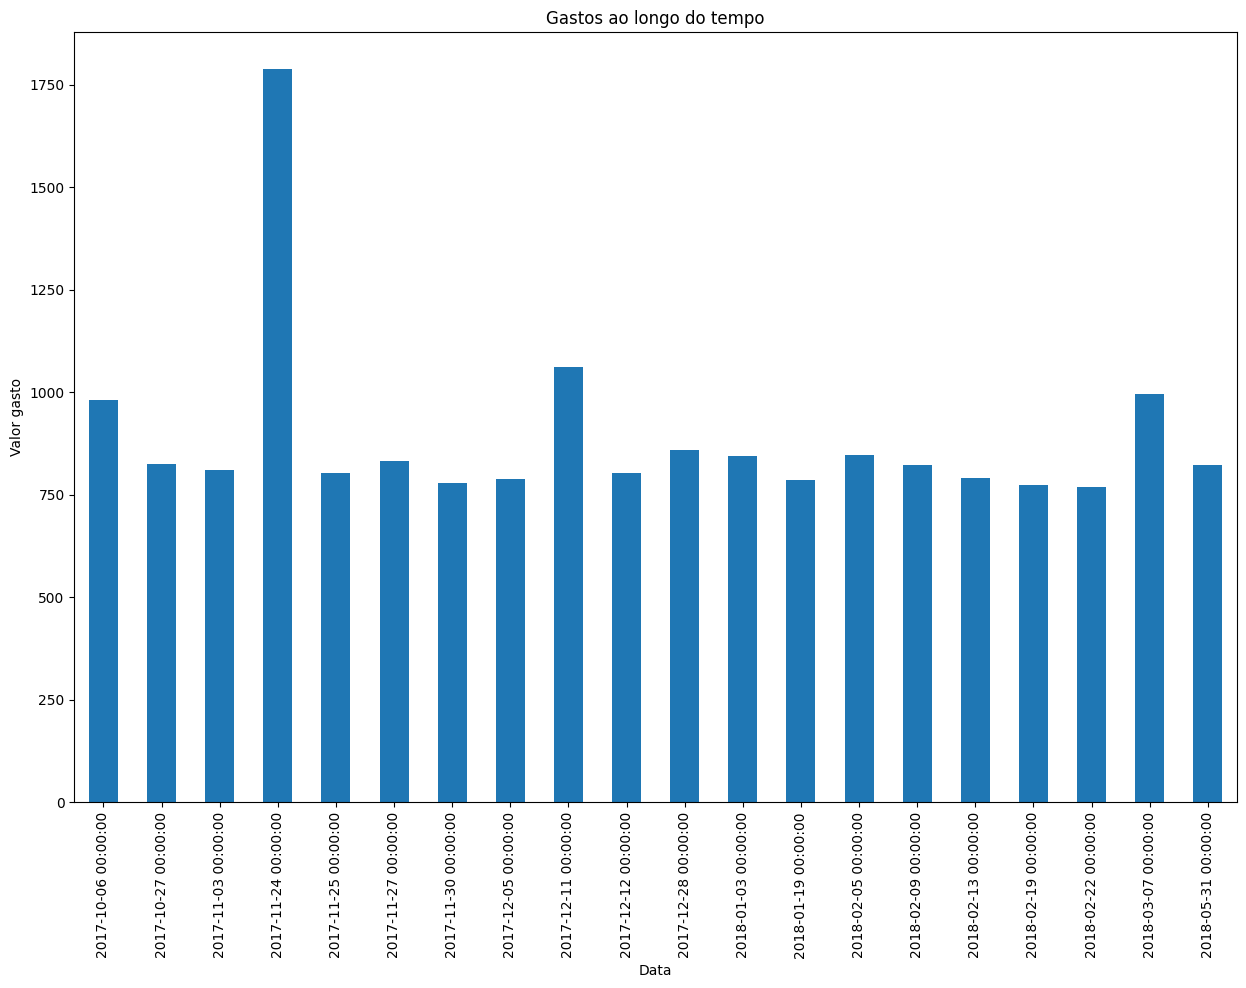

In [50]:
costs_over_time.plot(xlabel='Data',
                 ylabel='Valor gasto',
                 x='dt',
                 y='costs',
                 kind = 'bar',
                 figsize=(15, 10),
                 title='Gastos ao longo do tempo')

plt.show()

<s>
<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisa plotar gráfico
</div>

In [51]:
costs_us

,source_id,dt,costs,day,week,month
0,1,2017-06-01,75.20,2017-06-01,2017-05-29/2017-06-04,2017-06
1,1,2017-06-02,62.25,2017-06-02,2017-05-29/2017-06-04,2017-06
2,1,2017-06-03,36.53,2017-06-03,2017-05-29/2017-06-04,2017-06
3,1,2017-06-04,55.00,2017-06-04,2017-05-29/2017-06-04,2017-06
4,1,2017-06-05,57.08,2017-06-05,2017-06-05/2017-06-11,2017-06
...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-27,2018-05-21/2018-05-27,2018-05
2538,10,2018-05-28,21.26,2018-05-28,2018-05-28/2018-06-03,2018-05
2539,10,2018-05-29,11.32,2018-05-29,2018-05-28/2018-06-03,2018-05
2540,10,2018-05-30,33.15,2018-05-30,2018-05-28/2018-06-03,2018-05


In [52]:
costs_us['dt']= pd.to_datetime(costs_us['dt'])
costs_us['first_order_month'] = costs_us['dt'].dt.to_period('M')

# Quanto custou a aquisição de clientes para cada origem?

In [53]:
cac = costs_us.groupby('first_order_month')['costs'].sum().reset_index()
cac = pd.merge(cac, corrot_size, on='first_order_month')

In [54]:
cac['cac'] = cac['costs'] / cac['uid']

In [55]:
cac = pd.merge(cac, df_ltv, on='first_order_month')

In [56]:
cac

,first_order_month,costs,uid_x,cac,age,revenue,uid_y,ltv
0,2017-06,18015.00,2023,8.905091,0,9557.49,2023,4.724414
1,2017-06,18015.00,2023,8.905091,1,981.82,2023,0.485329
2,2017-06,18015.00,2023,8.905091,2,885.34,2023,0.437637
3,2017-06,18015.00,2023,8.905091,3,1931.30,2023,0.954671
4,2017-06,18015.00,2023,8.905091,4,2068.58,2023,1.022531
...,...,...,...,...,...,...,...,...
73,2018-03,30415.27,3533,8.608907,1,1063.05,3533,0.300892
74,2018-03,30415.27,3533,8.608907,2,1114.87,3533,0.315559
75,2018-04,22289.38,2276,9.793225,0,10600.69,2276,4.657597
76,2018-04,22289.38,2276,9.793225,1,1209.92,2276,0.531599


# Os investimentos valeram a pena? (ROI)

In [57]:
cac['romi'] = cac['ltv'] / cac['cac']

<AxesSubplot:xlabel='age', ylabel='first_order_month'>

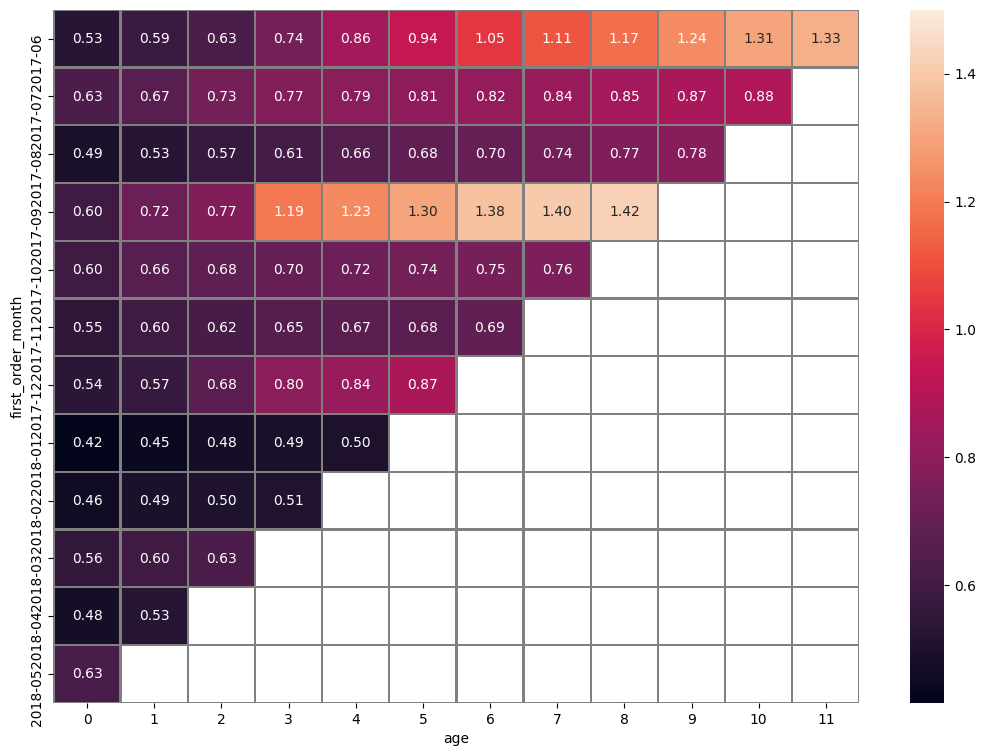

In [58]:
plt.figure(figsize=(13, 9))
sns.heatmap(cac.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi', aggfunc = 'sum').cumsum(axis = 1), annot=True, fmt='.2f', linewidths=1, linecolor='grey', vmax=1.5)

Conclusão:
Os investiemtos feitos até entao, obtiveram resultados bastate positivos. Porem, para melhorar ainda mais esses resultados, seria interessante investir em anuncios mais parecidos com o tipo 3, já que ele foi o que mais converteu clientes; alem de melhorar os anuncios para dispositivos touch, já que os dispositivos tipo desktop tiveram um desempenho quase 2x maior que os touch.



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O cálculo do CAC está incorreto. Precisa calcular e plotar o CAC por mês. Vou deixar código como exemplo
    

```СAC_by_month = pd.merge(costs.groupby('costs_month').agg({'costs': 'sum'}), 
                        buyers.groupby('first_order_month').agg({'uid': 'nunique'}), 
                        left_index=True, 
                        right_index=True)
СAC_by_month['cac'] = СAC_by_month['costs']  / СAC_by_month['uid']```
</div>


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Erro no código. O cálculo do ROMI está incorreto. Se não me engano, o ROMI é dado por LTV/CAC. Fora que você precisa calcular para cada fonte.
</div>